# Problem 1
Jingquan Li (119010148)
DDA3020 Homework1 Coding Problems

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Step 1: Use pandas library to load the csv file into pandas.Dataframe. Use Dataframe.astype function to convert the data type of “Neighborhood” attribute to “category” type. 
Use Dataframe.info and Dataframe.describe functions to check the dataset. Briefly summarize the information of the dataset.

In [2]:
# Load the csv file into pandas.Dataframe
data = pd.read_csv('house_prices.csv')

# Convert the data type of the "Neighborhood" attribute to "category" type
data['Neighborhood'] = data['Neighborhood'].astype('category')

# Check the dataset
print("dataset check:")
print(data.info())
print(data.describe())


dataset check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB
None
              SqFt    Bedrooms   Bathrooms          Price
count   128.000000  128.000000  128.000000     128.000000
mean   2000.937500    3.023438    2.445312  130427.343750
std     211.572431    0.725951    0.514492   26868.770371
min    1450.000000    2.000000    2.000000   69100.000000
25%    1880.000000    3.000000    2.000000  111325.000000
50%    2000.000000    3.000000    2.000000  125950.000000
75%    2140.000000    3.000000    3.000000  148250.000000
max    2590.000000    5.000000    4.000000  211200.00

Step 2: Use seaborn library to visualize dataset. Use seaborn.pairplot function to plot the
“Price” against each numeric attributes “SqFt”, “Bedrooms” and “Bathrooms” with data
points colored differently based on the values of the “Neighborhood” category attributes.
Use seaborn.heatmap function to plot the pairwise correlation on data. Briefly analyze the
potential patterns between “Price” and other attributes.

/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

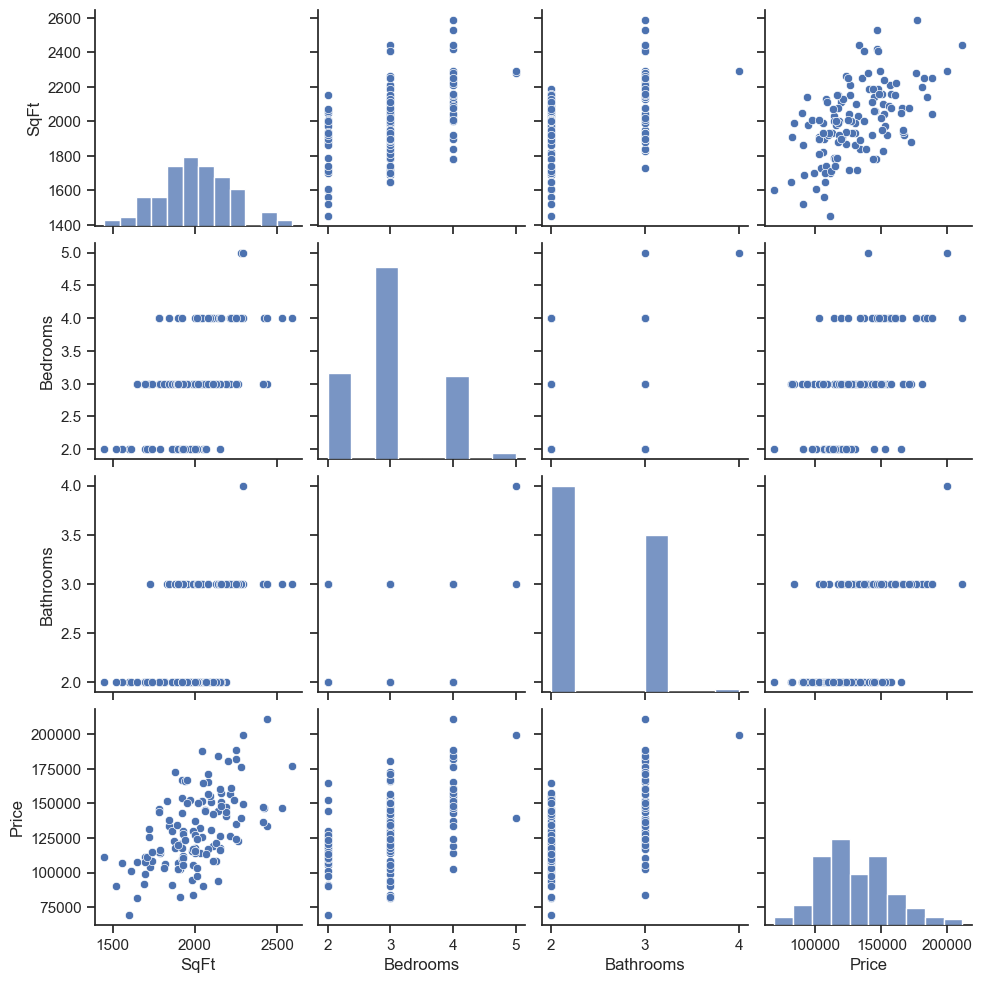

In [3]:
# Set the style of seaborn plots
sns.set(style="ticks")

# Use seaborn.pairplot function to plot the “Price” against each numeric attributes “SqFt”, 
# “Bedrooms” and “Bathrooms” with data points colored differently based on the values of 
# the “Neighborhood” category attributes
sns.pairplot(data)

/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lijingquan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureW

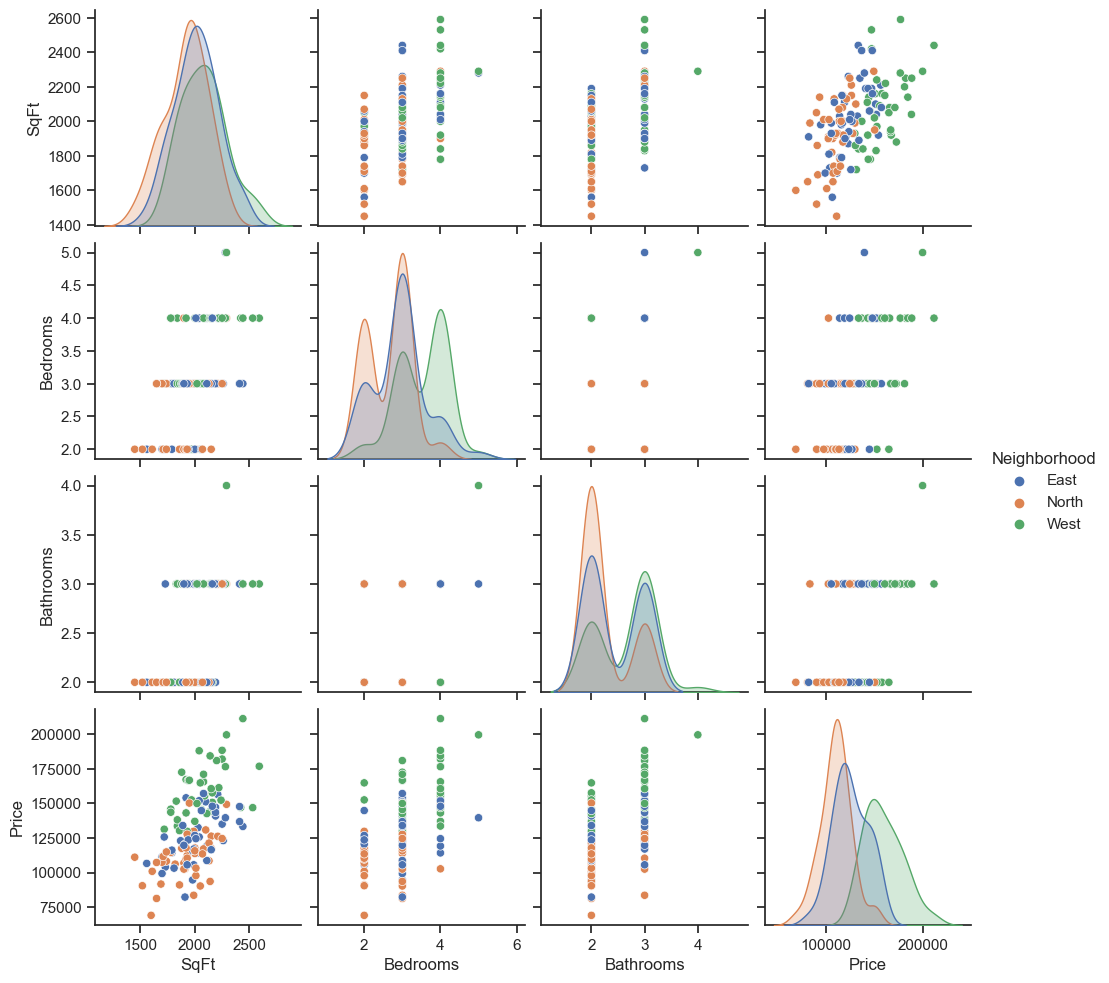

In [4]:
# Data visualiztion with category variable
sns.pairplot(data, hue = "Neighborhood")

In [31]:
# Get the dummy variables
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,SqFt,Bedrooms,Bathrooms,Price,Neighborhood_North,Neighborhood_West
0,1790,2,2,114300,False,False
1,2030,4,2,114200,False,False
2,1740,3,2,114800,False,False
3,1980,3,2,94700,False,False
4,2130,3,3,119800,False,False


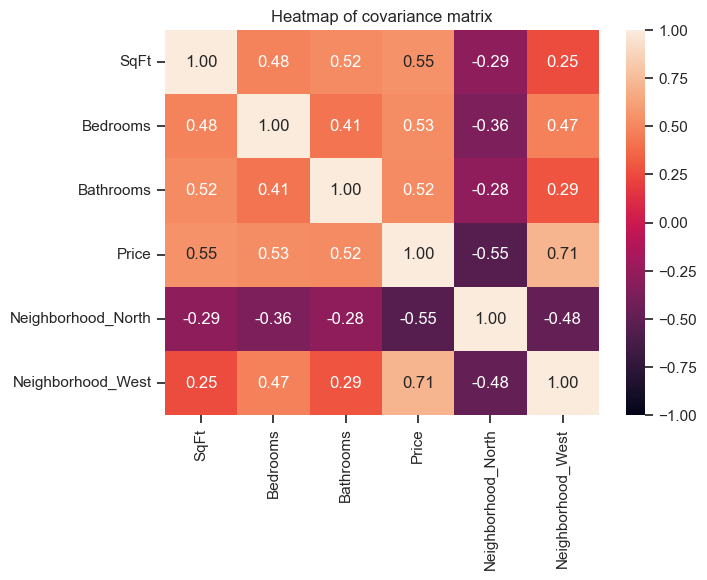

In [32]:
# Plot pairwise correlation using heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(data_dummy.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, yticklabels=True)
plt.title("Heatmap of covariance matrix")
plt.show()

Step 3: Use sklearn library to process the category variable. For category variable “Neighborhood”, we could use ColumnT ransformer function in sklearn.compose and OneHotEncoder
function in sklearn.preprocessing to convert the category column into a one-hot numeric
matrix in the dataset. Use sklearn library to split data into train and test subset. We use
train test split in sklearn.model selection to randomly split the data into two parts, one
contains 80% of the samples as train data and the other contains 20% of the samples as test
data.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Step 3: Process the categorical variable "Neighborhood"
# Define the transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Neighborhood'])
    ],
    remainder='passthrough'
)

# Apply the transformation
X = ct.fit_transform(data.drop(columns=['Price']))
y = data['Price']

# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3020)

print("train size: ", X_train.shape[0])
print("test size: ", X_test.shape[0])


train size:  102
test size:  26


Step 4: Use sklearn library to train and evaluate a linear regression model. We use
LinearRegression function in sklearn.linear model to train a linear regression model with
“Price” as target and “SqFt”, “Bedrooms”, “Bathrooms”, “Neighborhood” as predictors. After training (model.f it) and predicting (model.predict) on train and test dataset, we could
use mean squared error function in sklearn.metrics to evaluate the performance of fitted
model. Report the training error and testing error in terms of RMSE.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train and evaluate a linear regression model
# Initialize the linear regression model
model = LinearRegression()

# Fit the model using training data
model.fit(X_train, y_train)

# Predict on training and test datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE for training and testing datasets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the training and testing errors
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


Training RMSE: 14180.603255747075
Testing RMSE: 15766.97214688351


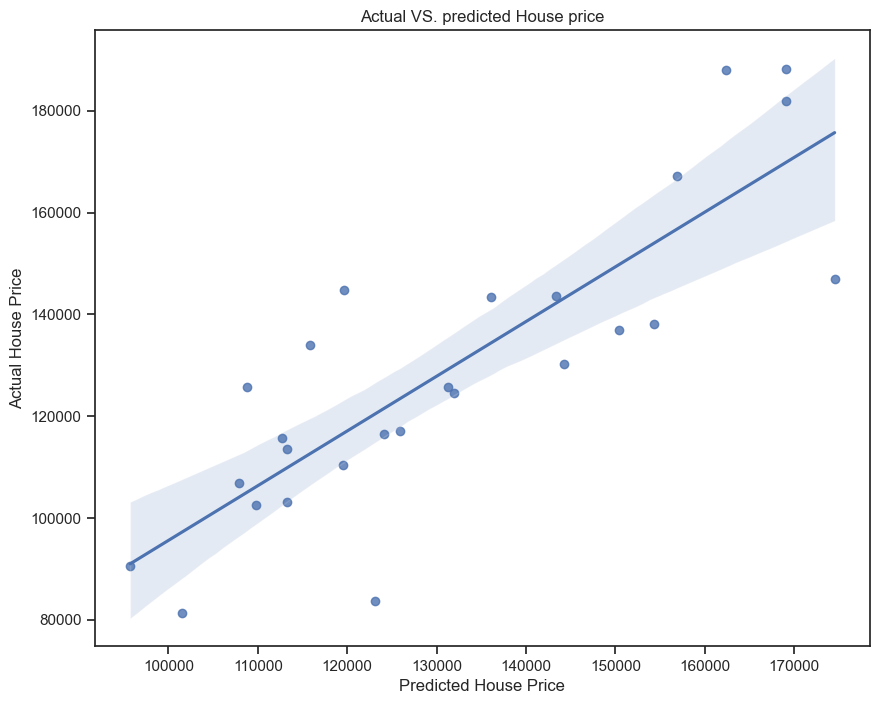

In [35]:
# Plot Actual values vs fitted values

fig=plt.figure(figsize=(10,8))
sns.regplot(x=y_test_pred, y=y_test)
plt.xlabel ('Predicted House Price')
plt.ylabel ('Actual House Price')
plt.title('Actual VS. predicted House price')
plt.show()

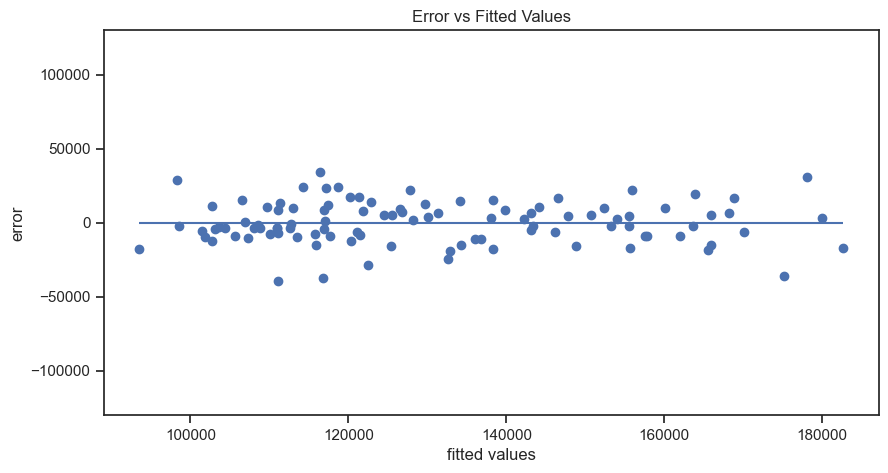

In [38]:
# Plot error vs fitted values
fig=plt.figure(figsize=(10,5))
plt.scatter(model.predict(X_train), model.predict(X_train)-y_train)
plt.hlines(0, min(model.predict(X_train)), max(model.predict(X_train)))
plt.xlabel ('fitted values')
plt.ylim(-130000,130000)
plt.ylabel ('error')
plt.title('Error vs Fitted Values')
plt.show()

# Problem 2

Step 1 Use numpy library to conduct the training of linear regression model. We use matrix operations in numpy to write the codes of learning the parameters with gradient descent methods.

In [59]:
import numpy as np
from sklearn.datasets import load_diabetes

# Step 1: Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, :10]  # Selecte attributes 1-10
y = diabetes.target

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Function to compute mean squared error
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

# Initialize theta (parameters) with zeros
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the linear regression model using gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the learned parameters
print("Learned parameters:", theta)

Learned parameters: [152.12691637   6.50828076   1.28806748  20.8265647   15.61326631
   7.24508406   5.85554099 -13.90078374  15.01590614  19.99313426
  13.39901343]


Step 2: Randomly split the data into two parts, one contains 80% of the samples and the other contains 20% of the samples. Use the first part as training data and train a linear regression model and make prediction on the second part. Report the training error and testing error in terms of RMSE. Plot the loss curves in the training process.

Training Error (in RMSE): 75.5149134242802
Testing Error (in RMSE): 70.78385118285611


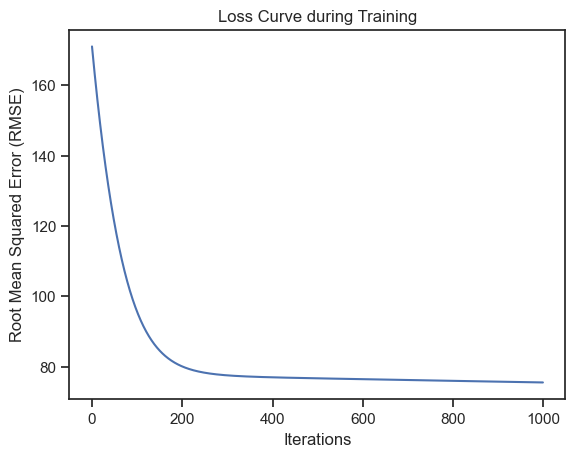

In [61]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute mean squared error (MSE)
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    mse = (1/m) * np.sum(np.square(predictions - y))
    return mse

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    rmse_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        rmse_history[i] = np.sqrt(compute_mse(X, y, theta))
    
    return theta, mse_history

# Initialize theta (parameters) with zeros
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Train the linear regression model using gradient descent
theta, mse_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Make predictions on the testing data
y_test_pred = X_test.dot(theta)

# Calculate RMSE for training and testing data
train_rmse = np.sqrt(compute_mse(X_train, y_train, theta))
test_rmse = np.sqrt(compute_mse(X_test, y_test, theta))

# Print the training and testing errors
print("Training Error (in RMSE):", train_rmse)
print("Testing Error (in RMSE):", test_rmse)

# Plot the loss curve during training
plt.plot(range(iterations), mse_history)
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Loss Curve during Training')
plt.show()

Step 3: Repeat the splitting, training, and testing for 10 times with different parameters such as step size, iterations, etc. Use a loop and print the RMSE in each trial. Analyze the influence of different parameters on RMSE.

In [65]:
# Set the number of trials
num_trials = 10

print(f'Trial\tLearning Rate\t\tIteration number\tTraining error in RMSE\t\tTesting error in RMSE')
for i in range(num_trials):
    # Randomly split the data into training and testing sets
    perm = np.random.permutation(X.shape[0])
    train_idx = perm[:int(0.8 * len(perm))]  # 80% of samples for training
    test_idx = perm[int(0.8 * len(perm)):]   # 20% of samples for testing
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Initialize theta (parameters) with zeros
    theta = np.zeros(X.shape[1])

    # Set hyperparameters
    learning_rate = np.random.uniform(0.001, 0.1)  # Randomly select learning rate between 0.001 and 0.1
    iterations = np.random.randint(100, 1000)      # Randomly select number of iterations between 100 and 1000

    # Train the linear regression model using gradient descent
    theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

    # Compute predictions on training and testing data
    y_train_pred = X_train.dot(theta)
    y_test_pred = X_test.dot(theta)

    # Compute RMSE for training and testing data
    train_rmse = np.sqrt(np.mean((y_train_pred - y_train)**2))
    test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))

    # Print the RMSE for each trial
    print(f"{i+1}\t{learning_rate}\t{iterations}\t\t\t{train_rmse}\t\t{test_rmse}")

Trial	Learning Rate		Iteration number	Training error in RMSE		Testing error in RMSE
1	0.08768050829387422	901			64.97623545988635		62.75010091514034
2	0.03521759565955094	556			72.75642453223223		72.8021191277499
3	0.04053492421038708	923			69.70970562619212		69.97123311745507
4	0.06925355458074002	486			69.76558145002915		72.41291040329193
5	0.013673862446637477	692			75.56802167700405		71.94738769858077
6	0.011777856130416436	804			75.09544437508602		73.74636792951897
7	0.041978235680492686	264			73.83993114498472		76.56029805784054
8	0.02471675276038744	529			74.81244987357903		70.33574123586904
9	0.010265142033388045	259			76.82559348655353		79.41822538701946
10	0.03334253482154185	805			72.30158358114656		66.46128530940095
